# Black Friday

## 1. Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## 2. Hypothesis

1. One User Can Purchase more than one Product
2. One Product can be Purchased by more than one User.
3. One Product belongs to more than one Product Category.

## 3. Data

1. <b>1.Variable  Definition</b>
2. <b>User_ID User ID</b>
3. <b>Product_ID Product ID</b>
4. <b>Gender Sex of User</b>
5. <b>Age Age in bins</b>
6. <b>Occupation Occupation (Masked)</b>
7. <b>City_Category Category of the City (A,B,C)</b>
8. <b>Stay_In_Current_City_Years Number of years stay in current city</b>
9. <b>Marital_Status Marital Status</b>
10. <b>Product_Category_1 Product Category (Masked)</b>
11. <b>Product_Category_2 Product may belongs to other category also (Masked)</b>
12. <b>Product_Category_3 Product may belongs to other category also (Masked)</b>
13. <b>Purchase Purchase Amount (Target Variable)</b>

## 4. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import  mean_squared_error,make_scorer
import warnings
warnings.filterwarnings("ignore")

## 5. Read Data

In [2]:
train_df=pd.read_csv('E:/Analytics Vidhya Contest/Black Friday/train.csv')
test_df=pd.read_csv('E:/Analytics Vidhya Contest/Black Friday/test.csv')

In [3]:
test_df_copy=test_df.copy()

In [4]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
train_df.shape,test_df.shape

((550068, 12), (233599, 11))

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Since its not necessary for each product to belong to different Category thus <b>Product_Category_2</b> and <b>Product_Category_3</b> have <b>missing</b> values.

In [8]:
train_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


1. Majority of the users have Marital_Status 0 assuming it represents Bachelors.
2. Purchase column have wide range. 

## 6.Exploratory Data Analysis

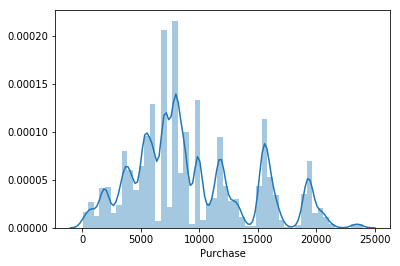

In [9]:
sns.distplot(train_df.Purchase)

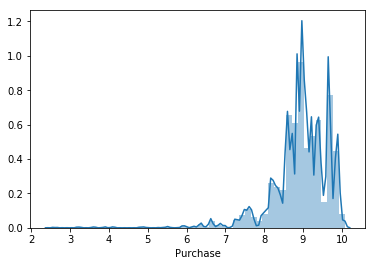

In [10]:
sns.distplot(np.log(train_df.Purchase))

In [11]:
Product_ID_Purchase_count=train_df.groupby('Product_ID')['Purchase'].agg(['count','mean']).sort_values('count',ascending=False)

In [12]:
Product_ID_Purchase_count.shape

(3631, 2)

There are 3631 unique products in our train dataset

In [13]:
Product_ID_Purchase_count.head(10)

,count,mean
Product_ID,,
P00265242,1880,7534.848404
P00025442,1615,17334.468111
P00110742,1612,16577.114764
P00112142,1562,15503.204866
P00057642,1470,15716.176871
P00184942,1440,16899.227083
P00046742,1438,14709.931850
P00058042,1422,8615.073136
P00145042,1406,14517.312945


#### Product_ID

In [14]:
Product_ID_Purchase_mean=train_df.groupby('Product_ID')['Purchase'].agg(['count','mean']).sort_values('mean',ascending=False)

In [15]:
Product_ID_Purchase_mean.head(10)

,count,mean
Product_ID,,
P00086242,273,21256.505495
P00085342,552,20980.268116
P00200642,269,20468.773234
P00116142,642,20463.791277
P00119342,308,20448.756494
P00117642,395,20400.283544
P00074542,1,20323.000000
P00341542,1,20291.000000
P00052842,982,20141.139511


In [16]:
Purchaselessthan100=train_df[['Product_ID','Product_Category_1','Purchase']][train_df['Purchase']<100]
Purchaselessthan100

,Product_ID,Product_Category_1,Purchase
545920,P00370293,19,48
545922,P00370293,19,24
545925,P00370293,19,62
545931,P00370293,19,49
545935,P00370293,19,49
545938,P00370293,19,38
545941,P00370853,19,26
545946,P00370293,19,12
545950,P00370293,19,13
545952,P00370853,19,50


In [17]:
pd.unique(Purchaselessthan100.Product_ID)

array(['P00370293', 'P00370853'], dtype=object)

1. If we observe the transaction less than 100 it is only for two Product_ID and one category.
2. For a particular Product_ID the Purchase Amount also varies.
3. Purchase is heavily dependent on the Product Category which is expected.

#### Age

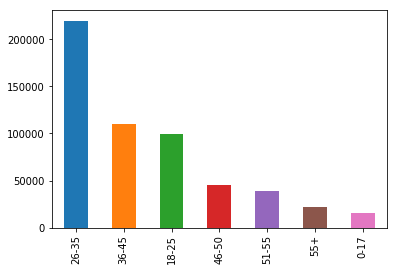

In [18]:
Age_count=pd.value_counts(train_df.Age)
Age_count.plot(kind='bar')

The number of transaction is evidently high for the age group of 26-35. 

In [19]:
Age_Purchase_mean=train_df.groupby('Age')['Purchase'].agg(['count','mean','median']).sort_values('mean',ascending=False)
Age_Purchase_mean

,count,mean,median
Age,,,
51-55,38501,9534.808031,8130.0
55+,21504,9336.280459,8105.5
36-45,110013,9331.350695,8061.0
26-35,219587,9252.690633,8030.0
46-50,45701,9208.625697,8036.0
18-25,99660,9169.663606,8027.0
0-17,15102,8933.464640,7986.0


#### Gender

In [20]:
pd.value_counts(train_df.Gender)

M    414259
F    135809
Name: Gender, dtype: int64

In [21]:
train_df.groupby('Gender')['Purchase'].agg(['count','mean'])

,count,mean
Gender,,
F,135809,8734.565765
M,414259,9437.526040


In [22]:
# Defining a function to provide percentages for cross tabs
def pctg(ser):
    return ser/float(ser[-1])

In [23]:
pd.crosstab(train_df.Gender,train_df.Marital_Status,margins=True).apply(pctg,axis=1)

Marital_Status,0,1,All
Gender,,,
F,0.580381,0.419619,1.0
M,0.593614,0.406386,1.0
All,0.590347,0.409653,1.0


We can observe almost same ratio of Gender and Marital_status 

#### Occupation

In [24]:
pd.value_counts(train_df.Occupation)

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

#### City_Category

In [25]:
train_df.groupby('City_Category')['Purchase'].agg(['count','mean','median'])

,count,mean,median
City_Category,,,
A,147720,8911.939216,7931
B,231173,9151.300563,8005
C,171175,9719.920993,8585


The Count as well average Purchase amount is relatively small for City A compared to B & C.

#### Stay_In_Current_City_Years

In [26]:
pd.crosstab(train_df.Stay_In_Current_City_Years,train_df.City_Category,margins=True).apply(pctg)

City_Category,A,B,C,All
Stay_In_Current_City_Years,,,,
0,0.163675,0.124093,0.125795,0.135252
1,0.333773,0.360825,0.356962,0.352358
2,0.183550,0.180696,0.192505,0.185137
3,0.167912,0.184671,0.162348,0.173224
4+,0.151090,0.149715,0.162389,0.154028
All,1.000000,1.000000,1.000000,1.000000


As observed from the above for all the 3 cities stay for customers is max for 1 years.

In [27]:
train_df.groupby('Stay_In_Current_City_Years')['Purchase'].agg(['count','mean','median'])

,count,mean,median
Stay_In_Current_City_Years,,,
0,74398,9180.075123,8025
1,193821,9250.145923,8041
2,101838,9320.429810,8072
3,95285,9286.904119,8047
4+,84726,9275.598872,8052


Average Purchase amount is almost similar for all the above Categories.

#### Marital_Status

In [28]:
train_df.groupby('Marital_Status')['Purchase'].agg(['count','mean','median'])

,count,mean,median
Marital_Status,,,
0,324731,9265.907619,8044
1,225337,9261.174574,8051


#### Product_Category_1

In [29]:
train_df.groupby('Product_Category_1')['Purchase'].agg(['count','mean','median']).sort_values('mean',ascending=True)

,count,mean,median
Product_Category_1,,,
19,1603,37.041797,37.0
20,2550,370.481176,368.0
13,5549,722.400613,755.0
12,3947,1350.859894,1401.0
4,11753,2329.659491,2175.0
18,3125,2972.864320,3071.0
11,24287,4685.268456,4611.0
5,150933,6240.088178,6912.0
8,113925,7498.958078,7905.0


### Data Preparation

In [30]:
train_df['Gender']=train_df['Gender'].map({'F':0,'M':1})
test_df['Gender']=test_df['Gender'].map({'F':0,'M':1})

In [31]:
train_df['Age']=train_df['Age'].map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})
test_df['Age']=test_df['Age'].map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})

In [32]:
train_df['City_Category']=train_df['City_Category'].map({'A':0,'B':1,'C':2})
test_df['City_Category']=test_df['City_Category'].map({'A':0,'B':1,'C':2})

In [33]:
train_df['Stay_In_Current_City_Years']=train_df['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4+':4})
test_df['Stay_In_Current_City_Years']=test_df['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4+':4})

In [34]:
train_df.Product_Category_2.fillna(value=0,inplace=True)
test_df.Product_Category_2.fillna(value=0,inplace=True)

In [35]:
train_df.Product_Category_3.fillna(value=0,inplace=True)
test_df.Product_Category_3.fillna(value=0,inplace=True)

In [36]:
user_id_series=train_df.User_ID.value_counts()
user_id_dict=user_id_series.to_dict()

In [37]:
train_df['User_ID']=train_df['User_ID'].apply(lambda x:user_id_dict[x])

In [38]:
test_df['User_ID']=test_df['User_ID'].apply(lambda x:user_id_dict[x])

In [39]:
product_id_series=train_df.Product_ID.value_counts()
product_id_dict=product_id_series.to_dict()

In [40]:
train_df['Product_ID']=train_df['Product_ID'].apply(lambda x:product_id_dict[x])

In [41]:
product_id_test_series=test_df.Product_ID.value_counts()
product_id_test_dict=product_id_test_series.to_dict()

In [42]:
product_id_test_dict.update(product_id_dict)

In [43]:
test_df['Product_ID']=test_df['Product_ID'].apply(lambda x:product_id_test_dict[x])

In [44]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,35,227,0,0,10,0,2,0,3,0.0,0.0,8370
1,35,581,0,0,10,0,2,0,1,6.0,14.0,15200
2,35,102,0,0,10,0,2,0,12,0.0,0.0,1422
3,35,341,0,0,10,0,2,0,12,14.0,0.0,1057
4,77,203,1,6,16,2,4,0,8,0.0,0.0,7969


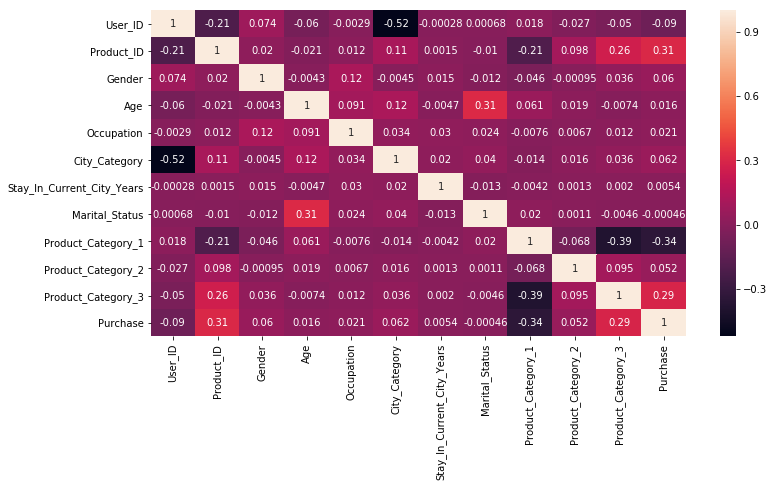

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(train_df.corr(),annot=True)

In [46]:
X=train_df.drop('Purchase',axis=1)

In [47]:
y=train_df['Purchase']

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.33)

### Modelling

In [49]:
linearReg=LinearRegression()
linearReg.fit(X_train,y_train)
y_pred_lr=linearReg.predict(X_test)
np.math.sqrt(mean_squared_error(y_test,y_pred_lr))

4507.958532068787

In [50]:
rfReg=RandomForestRegressor(random_state=42)
rfReg.fit(X_train,y_train)
y_pred_rf=rfReg.predict(X_test)
np.math.sqrt(mean_squared_error(y_test,y_pred_rf))

2855.2381852136737

In [51]:
param_grid={'n_estimators':[100,150,200,250,300],'max_features':['auto','sqrt','log2','0.2'],'min_samples_leaf':[1,2,5,10,15]}

In [52]:
def rmse(y_true,y_pred):
    return np.math.sqrt(mean_squared_error(y_true,y_pred))

In [53]:
rmse_score=make_scorer(rmse,greater_is_better=False)

In [54]:
rf=RandomForestRegressor(oob_score=True,n_jobs=-1)

In [55]:
rfSearch_cv=GridSearchCV(rf,param_grid=param_grid,scoring=rmse_score)
#rfSearch_cv.fit(X_train,y_train)

In [56]:
etReg=ExtraTreesRegressor(min_samples_leaf=5,n_estimators=100)
etReg.fit(X_train,y_train)
y_pred_et=etReg.predict(X_test)
np.math.sqrt(mean_squared_error(y_test,y_pred_et))

2701.4684519381094

In [57]:
xg=xgb.XGBRegressor(max_depth=10)
xg.fit(X_train,y_train)
y_pred_xgb=xg.predict(X_test)
np.math.sqrt(mean_squared_error(y_test,y_pred_xgb))

2594.343210379221

In [58]:
xg=xgb.XGBRegressor(max_depth=10,min_child_weight=10)
xg.fit(X_train,y_train)
y_pred_xgb=xg.predict(X_test)
np.math.sqrt(mean_squared_error(y_test,y_pred_xgb))

2589.968754171577

In [59]:
y_final_pred=xg.predict(test_df)

In [60]:
my_submission = pd.DataFrame({'User_ID': test_df_copy.User_ID, 'Product_ID': test_df_copy.Product_ID,'Purchase':y_final_pred})
my_submission.to_csv('submission_blackfriday.csv', index=False)